# **2023 가장 많은 구독자를 가진 유튜브 채널 데이터 분석**

---



---

**배경**

> 스마트폰, 랩탑 등 디지털 도구를 일상에서 쉽게 사용할 수 있게 되면서 유튜브는 누구나 자신만의 비디오를 제작, 공유, 수익화할 수 있는 주요 플랫폼으로 떠올랐습니다. 2005년에 시작된 플랫폼인 유튜브는 출범한 지 약 20년이 다 되어가고 있습니다. 현재 하루에 약 370만 개의 비디오가 업로드되고 있습니다. 20년 전만 하더라도, 아무도 개인 영상을 통해 돈을 벌수 있고 이것이 인기있는 직업이 될 것이라는 생각을 할 수 없었습니다. 전통적인 방송 산업은 점차 그 영향력을 잃고있지만, 유튜브는 계속해서 관심을 받고 성장하고 있습니다. 이러한 배경에서, 개인 크리에이터가 자신의 채널을 성장시키고, 특정 집단이 그들의 영향력을 높이는 등 다양한 목적을 위해 유튜브 데이터를 분석하는 것은 큰 도움이 될 것입니다.

**목적**

> 1. 국가별 유튜부 채널 분석
- 어느 나라에 영향력이 높은 크리에이터들이 많이 분포하고 있는지?
- 이들의 분포와 각 국가의 인구학적 특성이 관계가 있는지?
2. 카테고리 분석
- 가장 인기 있는 카테고리는 무엇인지?
- 지난 30일 동안 활발했던 채널과 그렇지 않은 채널 사이의 카테고리 차이점이 있는지?
- 카테고리 트렌드는 유튜브 시작인 2005년 이후부터 2023년까지 어떻게 변화했는지?

**목차**
1. IMPORT DATA
2. EDA
3. VISUALIZATION\
  3.1 COUNTRY-WISE\
  3.2 CATEGORY-WISE
4. CONCLUSION
5. LIMITATION

<details>
  <summary>Click for English version</summary>

  # **Yotube Data Analysis with most subscribed youtube channels 2023**


---



---

**MOTIVE**

> As digital tools have become ubiquitous, YouTube has emerged as a major platform, allowing anyone—not just those in the broadcasting industry—to create, share, and monetize their own videos. With nearly 3.7 million videos uploaded every day, YouTube’s growth since its inception in 2005 has been nothing short of remarkable. Twenty years ago, who would have imagined that creating and running one’s own "TV program" could be a viable career path? Traditional broadcasting networks are gradually losing their influence, while YouTube continues to expand. In this context, analyzing YouTube data is crucial for both individual creators looking to grow their presence and organizations seeking to make a broader societal impact.

**OBJECTIVE**


> 1. Country-wise Analysis
- Which countries have the most influential YouTubers?
- Is there any relationship between the presence of YouTubers and a country's demographic characteristics?
2. Category-wise Analysis
- Which categories are currently the most popular?
- What differences exist between categories of channels that have been active in the last 30 days versus those that have not?
- How have category trends evolved over time?

**CONTENTS OF TABLE**
1. IMPORT DATA
2. EDA
3. VISUALIZATION\
  3.1 COUNTRY-WISE\
  3.2 CATEGORY-WISE
4. CONCLUSION
5. LIMITATION



# 1. IMPORT DATA

In [30]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'global-youtube-statistics-2023:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3566603%2F6211042%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240828%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240828T051250Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5b2796d0833be27c65cc399151895ec7cfcbe86c761ece72c28cd3e63d8e2c88f9d8b50cab1f3037b90ab94810b1ccf05c9c5354b44f066cb42b6fe5553a32cff0f375dee6145d22b48aa5756376902fbc741f948daf73f090e63b96291449ed2ca00b524e950233784af51d37cf06537ab870d247cb0813336f8c605c99e284303b7ff8f6e1382101bec7afaf89ddd5d2f1270f9e9dce012caeb9477a40299a9eead3f94798a7cece60f883830af750284aa9edf58c2ed2b3c079290f1a8701848b6541a828e0bd455e8be3021cfd9bf52e0cda163ea578747650823286d3de9eedad3285b7c367e82bc14d5cf9cbec151c16bbb8c4fd42a0af2cad83bbf64b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 61533 bytes downloaded
Downloaded and uncompressed: global-youtube-statistics-2023
Data source import complete.


In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv


In [32]:
# Import necessary libraries

import geopandas as gpd
import matplotlib.pyplot as plt
!pip install country-converter
import country_converter as coco


import seaborn as sns
import matplotlib.gridspec as gridspec
import folium
from folium import plugins
from folium.plugins import MarkerCluster

In [33]:
# IMPORT DATA
df = pd.read_csv("/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv", encoding="latin-1")
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


# 2. EDA

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

27개의 변수로 각 질문에 맞게 시각화 가능하도록 별도의 데이터프레임 생성 계획
<details>
  <summary>Click for English version</summary>
Since there are 27 variables, it would be better to create separate DataFrames tailored to my specific objectives.

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,995.0,4.980000e+02,2.873761e+02,1.000000e+00,2.495000e+02,4.980000e+02,7.465000e+02,9.950000e+02
subscribers,995.0,2.298241e+07,1.752611e+07,1.230000e+07,1.450000e+07,1.770000e+07,2.460000e+07,2.450000e+08
video views,995.0,1.103954e+10,1.411084e+10,0.000000e+00,4.288145e+09,7.760820e+09,1.355470e+10,2.280000e+11
uploads,995.0,9.187126e+03,3.415135e+04,0.000000e+00,1.945000e+02,7.290000e+02,2.667500e+03,3.013080e+05
video_views_rank,994.0,5.542489e+05,1.362782e+06,1.000000e+00,3.230000e+02,9.155000e+02,3.584500e+03,4.057944e+06
country_rank,879.0,3.860535e+02,1.232245e+03,1.000000e+00,1.100000e+01,5.100000e+01,1.230000e+02,7.741000e+03
channel_type_rank,962.0,7.457193e+02,1.944387e+03,1.000000e+00,2.700000e+01,6.550000e+01,1.397500e+02,7.741000e+03
video_views_for_the_last_30_days,939.0,1.756103e+08,4.163782e+08,1.000000e+00,2.013750e+07,6.408500e+07,1.688265e+08,6.589000e+09
lowest_monthly_earnings,995.0,3.688615e+04,7.185872e+04,0.000000e+00,2.700000e+03,1.330000e+04,3.790000e+04,8.509000e+05
highest_monthly_earnings,995.0,5.898078e+05,1.148622e+06,0.000000e+00,4.350000e+04,2.127000e+05,6.068000e+05,1.360000e+07


구독자 수가 많은 채널을 데이터로 가져왔기 때문에 대부분의 변수들이 매우 큰 값으로 구성
<details>
  <summary>Click for English version</summary>
Since the data pertains to the most-subscribed YouTube channels around the world, many of the numerical variables have very large values.

In [36]:
df.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,0
video views,0
category,46
Title,0
uploads,0
Country,122
Abbreviation,122
channel_type,30


In [37]:
#remove missing data
df = df.dropna()
df.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,0
video views,0
category,0
Title,0
uploads,0
Country,0
Abbreviation,0
channel_type,0


정확한 분석을 위해 결측치 있는 행 삭제
<details>
  <summary>Click for English version</summary>

To ensure more accurate analysis, rows with missing values are removed.

In [38]:
#Check if there's an awkward value
df["created_year"].sort_values()

,created_year
101,1970.0
187,2005.0
70,2005.0
916,2005.0
519,2005.0
...,...
346,2021.0
389,2021.0
874,2021.0
310,2021.0


유튜브 2005년 시작
<details>
  <summary>Click for English version</summary>
Youtube has started since 2005.

In [39]:
# filter data after 2005
df_filtered = df[df["created_year"] >= 2005]

# remove rows with missing values
df = df_filtered.dropna()

2005년 이전 생성 채널 삭제
<details>
  <summary>Click for English version</summary>
The rows with created_year before 2005 are removed.

In [40]:
# Count the number of unique countries
df["Country"].value_counts()

,count
Country,
United States,178
India,139
Brazil,33
United Kingdom,26
Indonesia,19
Mexico,17
Russia,13
Thailand,13
Spain,11


In [41]:
#create dataframe for country-wise analysis
country_youtuber = df.groupby("Country").agg(
    youtubers=pd.NamedAgg(column="Youtuber", aggfunc="count"),
    max_subscriber=pd.NamedAgg(column="subscribers", aggfunc="max"),
    min_subscriber=pd.NamedAgg(column="subscribers", aggfunc="min"),
    total_subscriber=pd.NamedAgg(column="subscribers", aggfunc="sum"),
    max_view=pd.NamedAgg(column="video views", aggfunc="max"),
    min_view=pd.NamedAgg(column="video views", aggfunc="min"),
    total_view=pd.NamedAgg(column="video views", aggfunc="sum"),
    max_earning=pd.NamedAgg(column="highest_yearly_earnings", aggfunc="max"),
    low_earning=pd.NamedAgg(column="lowest_yearly_earnings", aggfunc="min"),
    latitude=pd.NamedAgg(column="Latitude", aggfunc="mean"),
    longitude=pd.NamedAgg(column="Longitude", aggfunc="mean")
).reset_index()

country_youtuber["avg_subscriber"] = round(country_youtuber['total_subscriber'] / country_youtuber['youtubers'], 0)
country_youtuber["avg_view"] = round(country_youtuber['total_view'] / country_youtuber['youtubers'], 0)
country_youtuber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           42 non-null     object 
 1   youtubers         42 non-null     int64  
 2   max_subscriber    42 non-null     int64  
 3   min_subscriber    42 non-null     int64  
 4   total_subscriber  42 non-null     int64  
 5   max_view          42 non-null     float64
 6   min_view          42 non-null     float64
 7   total_view        42 non-null     float64
 8   max_earning       42 non-null     float64
 9   low_earning       42 non-null     float64
 10  latitude          42 non-null     float64
 11  longitude         42 non-null     float64
 12  avg_subscriber    42 non-null     float64
 13  avg_view          42 non-null     float64
dtypes: float64(9), int64(4), object(1)
memory usage: 4.7+ KB


In [42]:
#create dataframe for country-wise analysis
country_info = df.groupby("Country").agg(
    GER=pd.NamedAgg(column="Gross tertiary education enrollment (%)", aggfunc="mean"),
    Population=pd.NamedAgg(column="Population", aggfunc="mean"),
    Unemployment_rate=pd.NamedAgg(column="Unemployment rate", aggfunc="mean"),
    Urban_pop=pd.NamedAgg(column="Urban_population", aggfunc="mean")
).reset_index()

In [43]:
country_youtuber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           42 non-null     object 
 1   youtubers         42 non-null     int64  
 2   max_subscriber    42 non-null     int64  
 3   min_subscriber    42 non-null     int64  
 4   total_subscriber  42 non-null     int64  
 5   max_view          42 non-null     float64
 6   min_view          42 non-null     float64
 7   total_view        42 non-null     float64
 8   max_earning       42 non-null     float64
 9   low_earning       42 non-null     float64
 10  latitude          42 non-null     float64
 11  longitude         42 non-null     float64
 12  avg_subscriber    42 non-null     float64
 13  avg_view          42 non-null     float64
dtypes: float64(9), int64(4), object(1)
memory usage: 4.7+ KB


In [44]:
country_youtuber["Country"].unique()

array(['Argentina', 'Australia', 'Barbados', 'Brazil', 'Canada', 'Chile',
       'China', 'Colombia', 'Cuba', 'Ecuador', 'Egypt', 'El Salvador',
       'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan',
       'Jordan', 'Kuwait', 'Latvia', 'Malaysia', 'Mexico', 'Netherlands',
       'Pakistan', 'Philippines', 'Russia', 'Samoa', 'Saudi Arabia',
       'Singapore', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Venezuela', 'Vietnam'],
      dtype=object)

In [45]:
#import world map to visualize
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-45-2732eac5758b>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [46]:
# Convert country names in the DataFrame to ISO 3166-1 alpha-3 codes
country_youtuber['iso_code'] = coco.convert(names=country_youtuber['Country'], to='ISO3')
country_info['iso_code'] = coco.convert(names=country_info['Country'], to='ISO3')
world['iso_code'] = coco.convert(names=world['name'], to='ISO3')

# merge with ISO code
country_youtuber = world.merge(country_youtuber, how="left", left_on="iso_code", right_on="iso_code")
country_info = world.merge(country_info, how="left", left_on="iso_code", right_on="iso_code")


In [47]:
#fill in the null in youtubers cols as 0
#remove other rows with null
country_youtuber["youtubers"] = country_youtuber["youtubers"].fillna(0)
country_youtuber.dropna(inplace=True)

# 3. VISUALIZATION

## 3.1 COUNTRY-WISE

**Q. 어느 나라에 영향력이 높은 크리에이터들이 많이 분포하고 있는지?**\
(**Which countries have the most influential YouTubers?**)

In [48]:
#create map from folium
m = folium.Map(location=[20, 0], zoom_start=2)

scaling_factor = 0.1  # scaling for size by the number of youtube channels

# add CircleMarker
for _, row in country_youtuber.iterrows():
    # latitude, longitude
    location = [row['latitude'], row['longitude']]

    # popup
    popup_info = (f"Country: {row['Country']}<br>"
                  f"Youtubers: {row['youtubers']}<br>"
                  f"Avg Subscriber: {row['avg_subscriber']:.0f}<br>"
                  f"Avg View: {row['avg_view']:.0f}")

    # marker size proportional to the number of YouTubers
    radius = row['youtubers'] * scaling_factor

    # CircleMarker
    folium.CircleMarker(
        location=location,
        radius=radius,
        popup=popup_info,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

m

m.save('map.html')


In [49]:
#from google.colab import files
#files.download('map.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-50-b3e413dc087c>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0])
<ipython-input-50-b3e413dc087c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = country_youtuber, x="youtubers", y="Country", palette='pastel', ax=ax0)


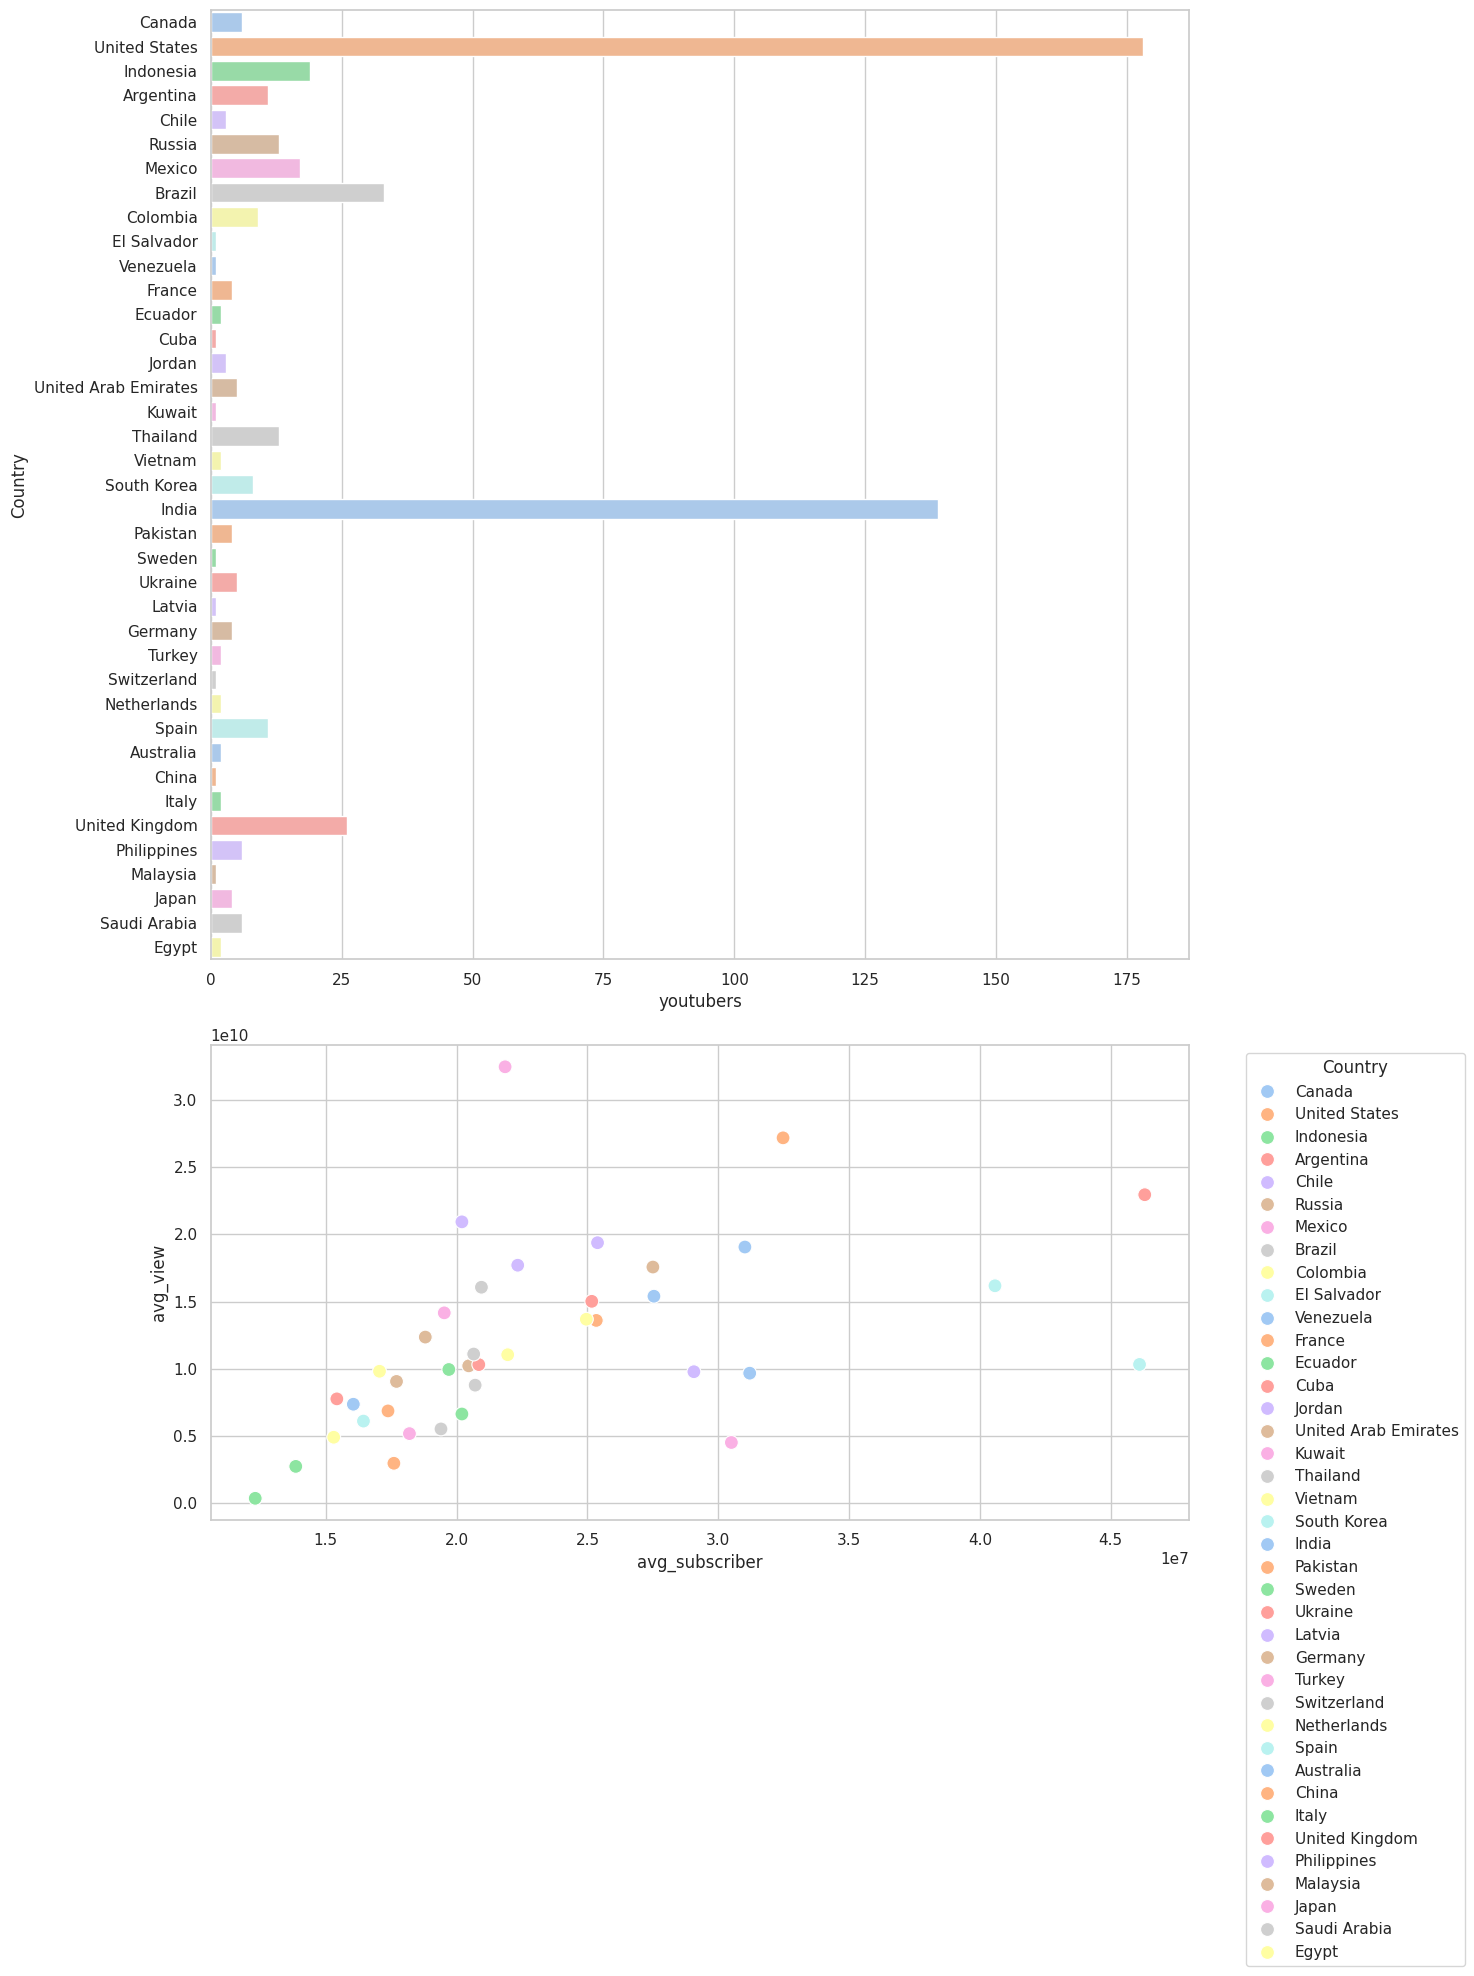

In [50]:
#Bar graph with the number of youtubers by country
fig, ax = plt.subplots(2, 1, figsize=(15,20))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

ax0 = plt.subplot(gs[0])
sns.barplot(data = country_youtuber, x="youtubers", y="Country", palette='pastel', ax=ax0)

#scatter plot for avg subscribers and avg views
ax1 = plt.subplot(gs[1])
sns.scatterplot(x='avg_subscriber', y='avg_view', hue='Country', data=country_youtuber, palette='pastel', s=100, ax=ax1)

# legend only for scatter plot
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



> - 구독자 수가 많은 유튜브 채널의 대부분은 미국과 인도에 집중되어 있으며, 영국, 브라질, 인도네시아, 멕시코에서도 상당한 비중을 차지.
- 유튜브 채널의 구독자 수와 조회 수 사이에는 일반적으로 양의 상관관계 존재.

<details>
  <summary>Click for English version</summary>

> - The majority of high-subscriber YouTube channels are concentrated in the United States and India, with significant representation also in the United Kingdom, Brazil, Indonesia, and Mexico.
- There is generally a positive correlation between the number of subscribers and views on YouTube channels.



**Q. 이들의 분포와 각 국가의 인구학적 특성이 관계가 있는지?**\
(**Is there any relationship between the presence of YouTubers and a country's demographic characteristics?**)

<Axes: >

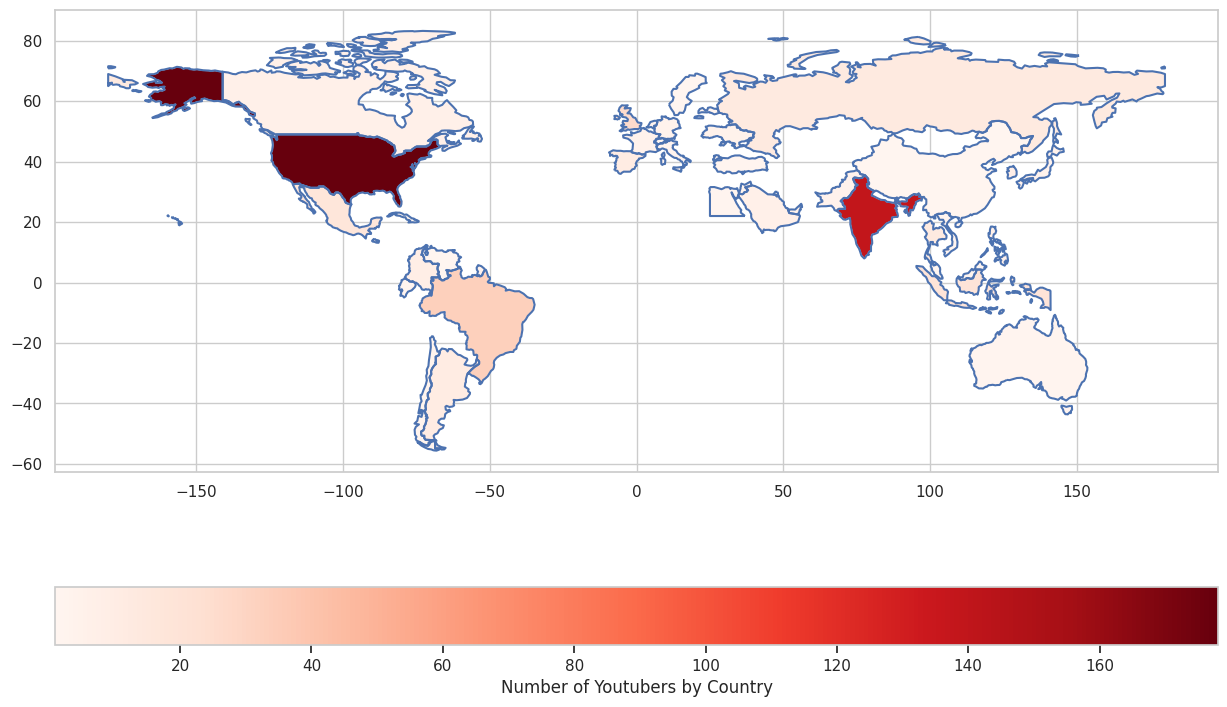

In [51]:
# 다른 컬러맵 사용 예시
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
country_youtuber.boundary.plot(ax=ax)

country_youtuber.plot(column="youtubers", ax=ax, legend=True,
           legend_kwds={'label': "Number of Youtubers by Country",
                        'orientation': "horizontal"},
           cmap="Reds")  # 다른 컬러맵 설정

Folium을 활용한 시각화와 같이 위의 지도 또한 같은 정보를 전달하고 있으나, 색상의 차이로 해당 정보 전달.

<details>
  <summary>Click for English version</summary>
Like the map from Folium above, this map also delivers the same information, but it uses color to represent the counts.

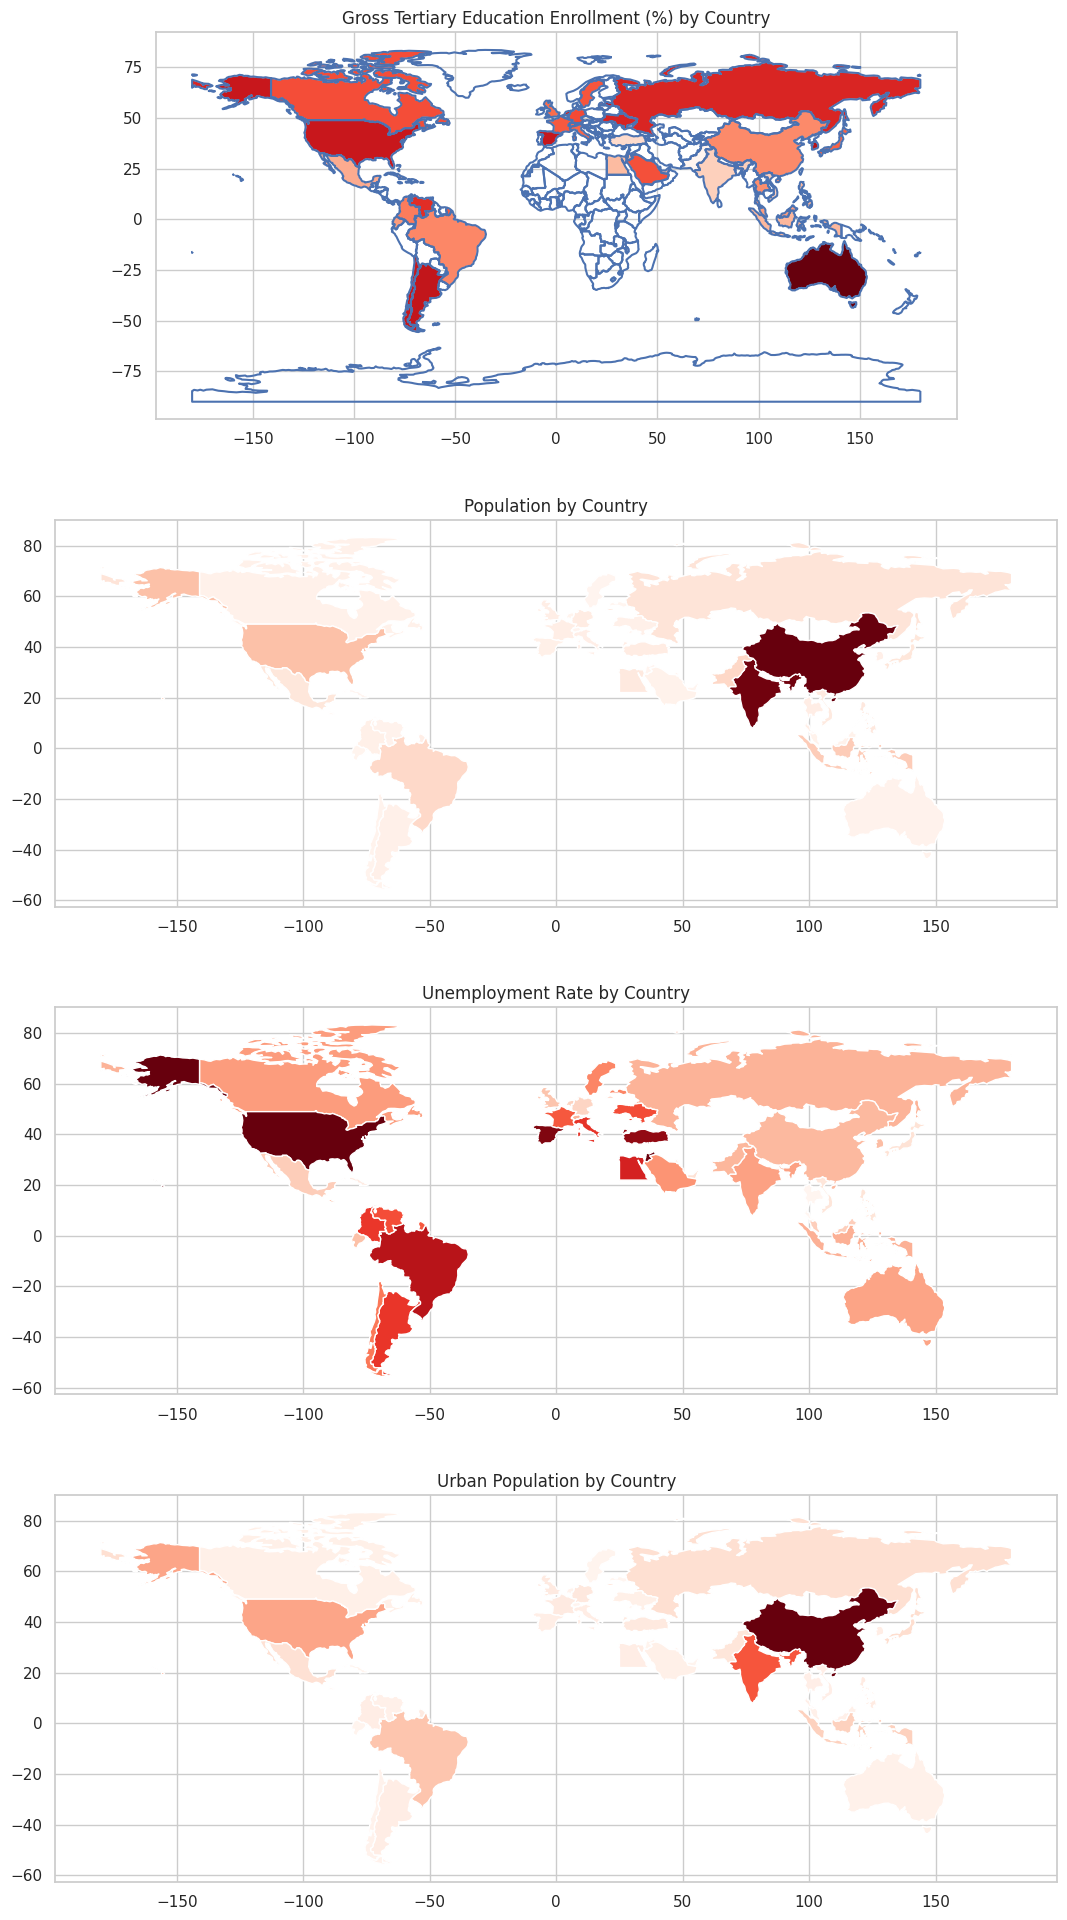

In [52]:
fig, ax = plt.subplots(4, 1, figsize=(15, 20))

country_info.boundary.plot(ax=ax[0])

# GER
country_info.plot(column="GER", ax=ax[0], legend=False,
           cmap="Reds")
ax[0].set_title('Gross Tertiary Education Enrollment (%) by Country')

# Population
country_info.plot(column="Population", ax=ax[1], legend=False,
           cmap="Reds")
ax[1].set_title('Population by Country')

# Unemployment Rate
country_info.plot(column="Unemployment_rate", ax=ax[2], legend=False,
           cmap="Reds")
ax[2].set_title('Unemployment Rate by Country')

# Urban Population
country_info.plot(column="Urban_pop", ax=ax[3], legend=False,
           cmap="Reds")
ax[3].set_title('Urban Population by Country')


plt.tight_layout(pad=3.0)

plt.show()



> 러시아가 현재 전쟁 중이고 중국이 유튜브 접근을 차단하고 있다는 점을 고려하여 유튜버 분포 지도를 네 가지 인구 통계 지도와 비교했을 때, 전체 인구 수와 도시 인구와 관련이 있음을 확인.

<details>
  <summary>Click for English version</summary>

> - By comparing the map of YouTubers with the four demographic maps, we see that the success of a YouTube channel is closely related to population size and urban population. This is evident considering that Russia is at war and China blocks access to YouTube.



## 3.2 CATEGORY-WISE


**Q. 가장 인기 있는 카테고리는 무엇인지?**\
(**Which categories are currently the most popular?**)

In [53]:
#count each category
df["category"].value_counts()

,count
category,
Entertainment,145
Music,110
People & Blogs,72
Gaming,49
Comedy,40
Education,33
Film & Animation,28
News & Politics,20
Howto & Style,13


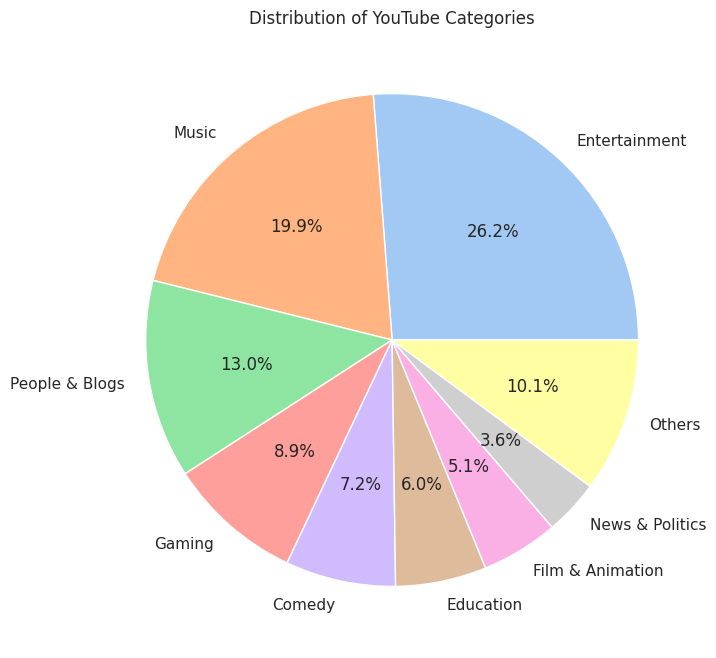

In [54]:
#visualize to pie chart

sns.set(style="whitegrid")

category_counts = df['category'].value_counts()
total = category_counts.sum()

# group the values lower than 2.5% to others
threshold = 0.025 * total
category_counts_filtered = category_counts[category_counts > threshold]
other_count = category_counts[category_counts <= threshold].sum()
category_counts_filtered['Others'] = other_count

#pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_counts_filtered, labels=category_counts_filtered.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

plt.title('Distribution of YouTube Categories')

plt.show()



> - 전체 카데고리의 분포는 Entertainment, Music, People&Blogs, Gaming 등의 순서로 이루어져 있음

<details>
  <summary>Click for English version</summary>

> - The most popular category overall is Entertainment, followed by Music, People & Blogs, Gaming, Comedy, and Education.




**Q. 지난 30일 동안 활발했던 채널과 그렇지 않은 채널 사이의 카테고리 차이점이 있는지?**\
(**What differences exist between categories of channels that have been active in the last 30 days versus those that have not?**)

In [55]:
df_view_30days = df.sort_values("video_views_for_the_last_30_days", ascending=False).reset_index()
df_subs_30days = df.sort_values("subscribers_for_last_30_days", ascending=False).reset_index()

#median
median_views = df_view_30days["video_views_for_the_last_30_days"].median()
median_subs = df_subs_30days["subscribers"].median()

#split data based on the median
above_median_views = df_view_30days[df_view_30days["video_views_for_the_last_30_days"] >= median_views]
below_median_views = df_view_30days[df_view_30days["video_views_for_the_last_30_days"] < median_views]

above_median_subs = df_subs_30days[df_subs_30days["subscribers"] >= median_subs]
below_median_subs = df_subs_30days[df_subs_30days["subscribers"] < median_subs]

#category counts
category_counts_above_median_views = above_median_views["category"].value_counts()
category_counts_below_median_views = below_median_views["category"].value_counts()

category_counts_above_median_subs = above_median_subs["category"].value_counts()
category_counts_below_median_subs = below_median_subs["category"].value_counts()

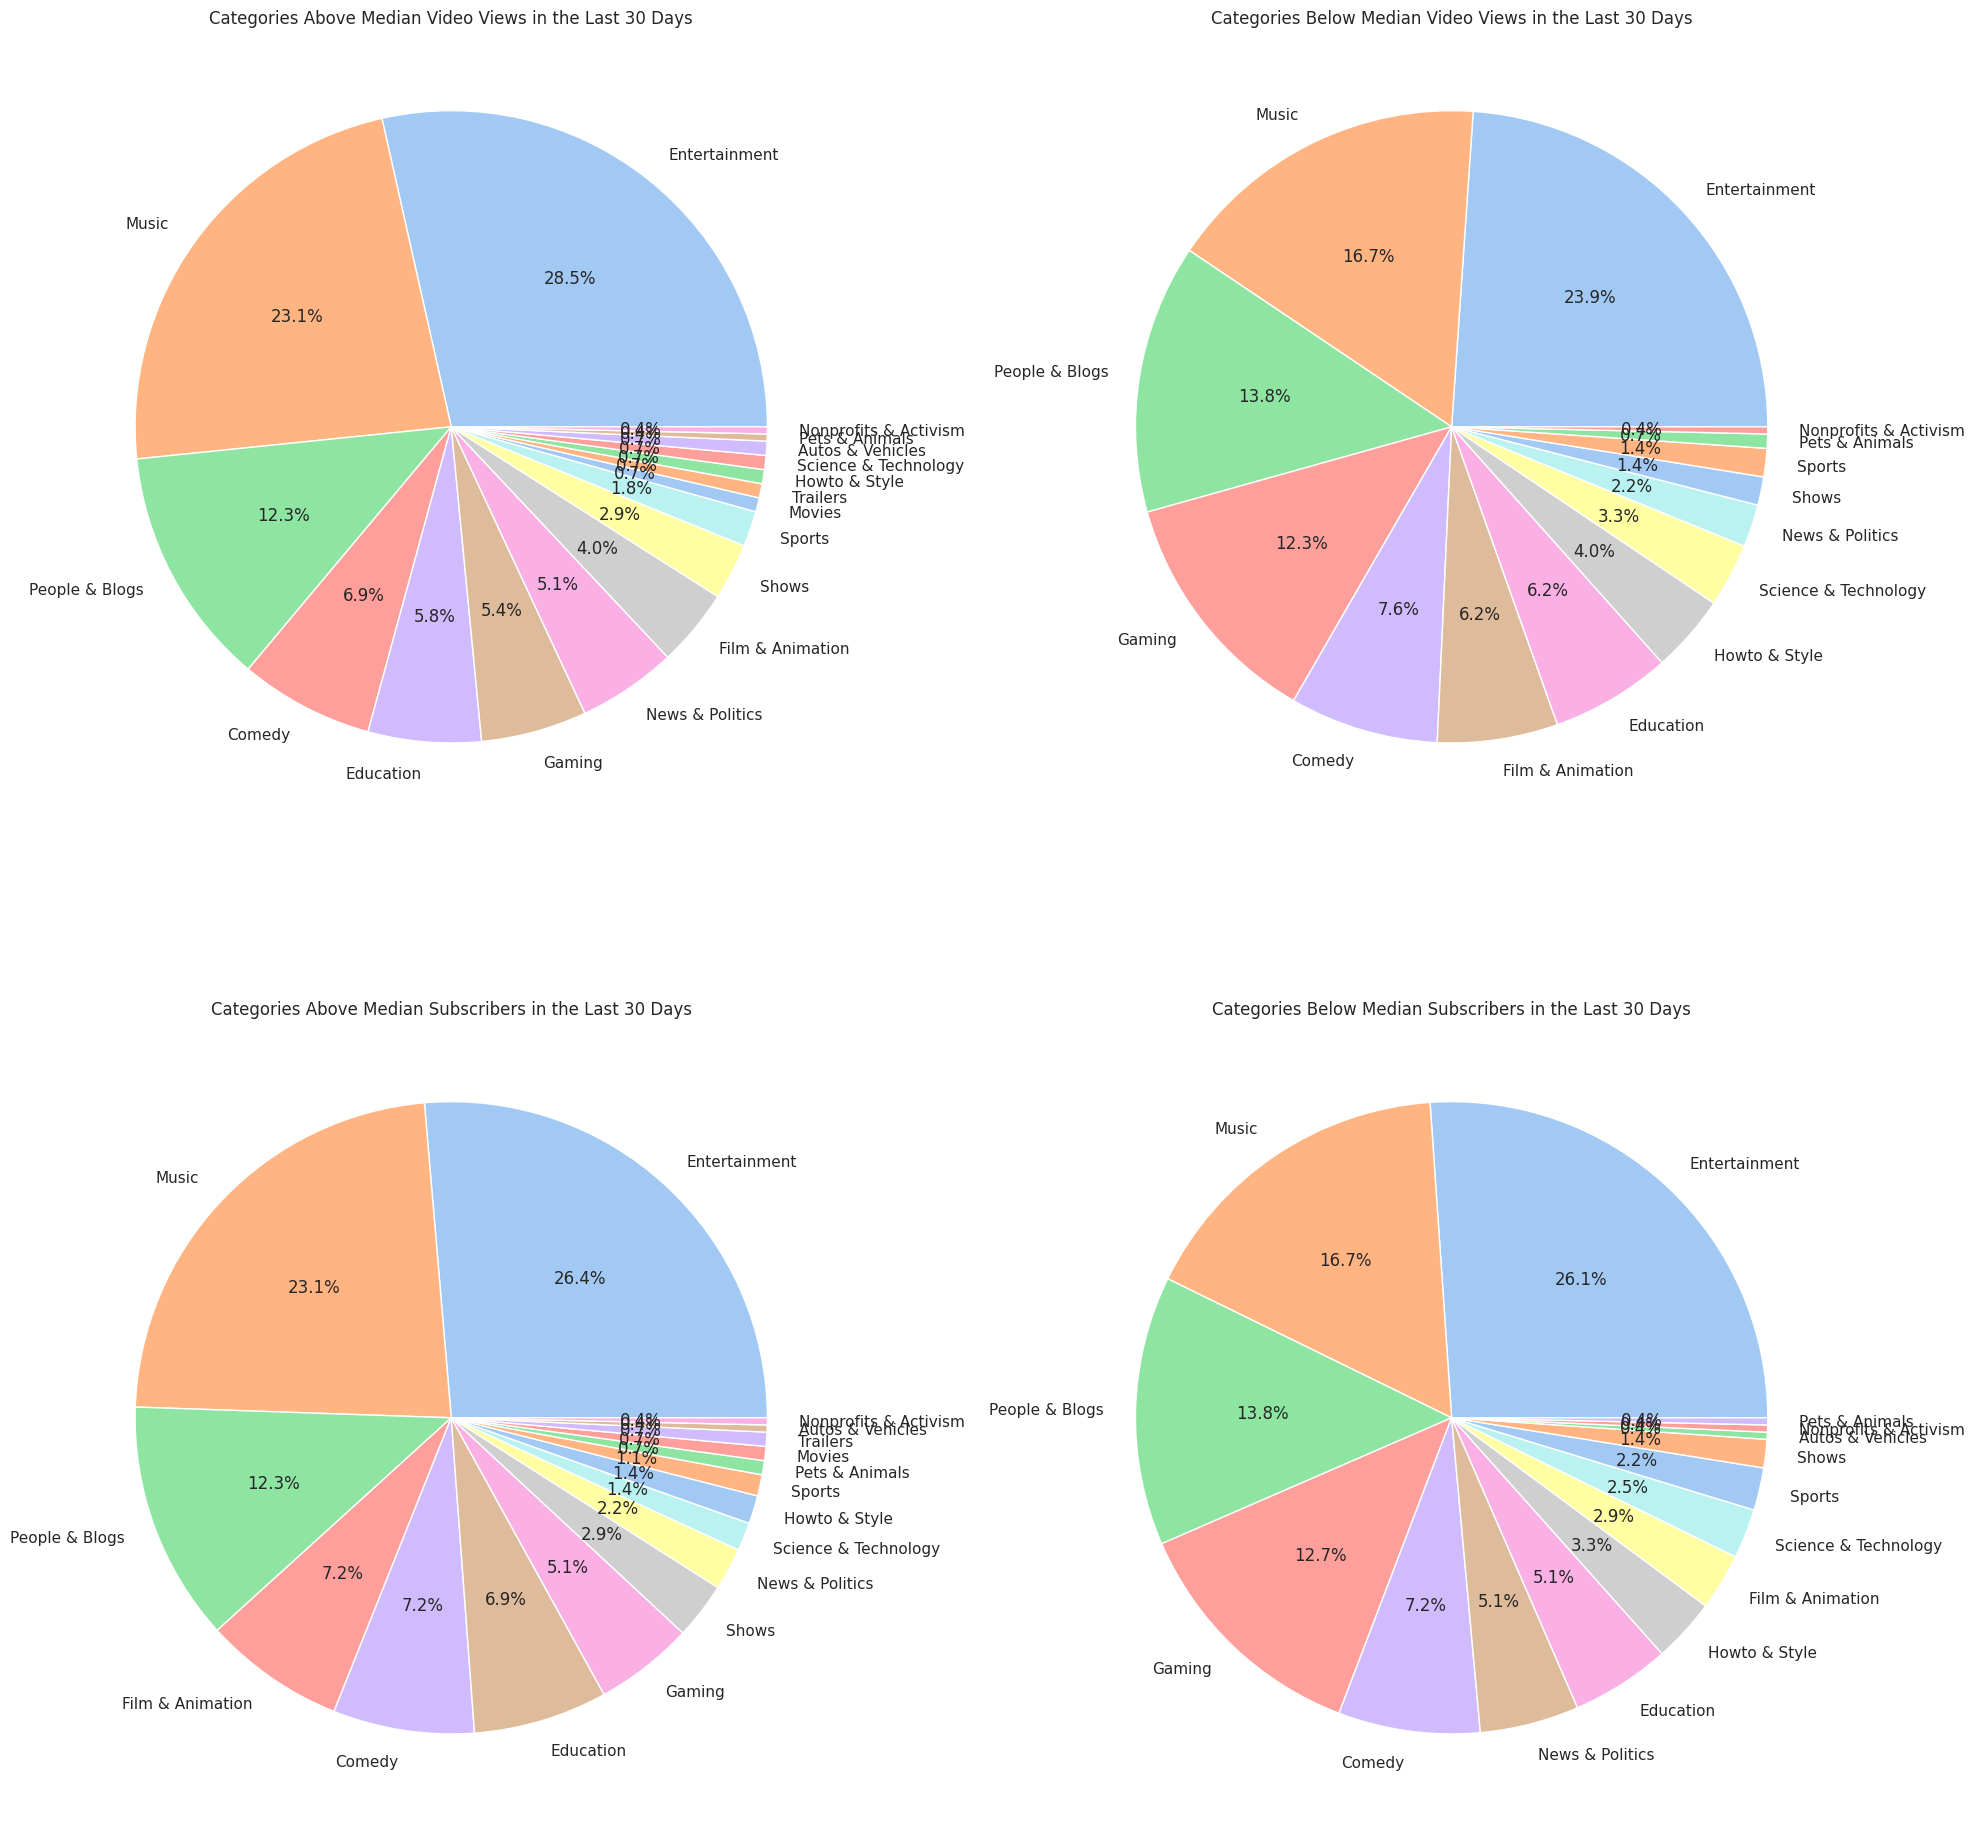

In [56]:
# 2x2 visualize (pie chart)
fig, ax = plt.subplots(2, 2, figsize=(20, 20))


ax[0, 0].pie(category_counts_above_median_views, labels=category_counts_above_median_views.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
ax[0, 0].set_title('Categories Above Median Video Views in the Last 30 Days')

ax[0, 1].pie(category_counts_below_median_views, labels=category_counts_below_median_views.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
ax[0, 1].set_title('Categories Below Median Video Views in the Last 30 Days')

ax[1, 0].pie(category_counts_above_median_subs, labels=category_counts_above_median_subs.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
ax[1, 0].set_title('Categories Above Median Subscribers in the Last 30 Days')

ax[1, 1].pie(category_counts_below_median_subs, labels=category_counts_below_median_subs.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
ax[1, 1].set_title('Categories Below Median Subscribers in the Last 30 Days')

plt.tight_layout()
plt.show()



> - Entertainment 카테고리 조회수(28.5%와 23.9%)와 구독자 수(26.4%와 26.1%) 모두에서 꾸준히 가장 높은 비율을 차지하며, 이는 높은 조회수와 높은 구독률을 반영.
- Nonprofits & Activism, Autos & Vehicles, Pets & Animals와 같은 카테고리는 모든 차트에서 상대적으로 낮은 비율을 보이며, 유튜브에서 덜 인기가 있음을 시사.
- Music 카테고리는 낮은 중위수 범위(16.7%)에서 구독자 수와 조회수 비율이 더 낮고, 높은 중위수 범위(23.1%)에서는 더 높은 비율을 보이며, 이는 덜 인기 있는 음악 콘텐츠가 조회수와 구독자 수가 적다는 것을 시사.
- 반면, Gaming 카테고리는 낮은 중위수 범위에서 더 높은 비율(7.6%)을 차지하지만, 높은 중위수 범위에서는 비율이 낮아(5.4%) 게임 콘텐츠가 특정 팬층을 끌어들일 수 있지만, 폭넓은 대중적 인기를 끌지 못할 수 있음을 전달.

<details>
  <summary>Click for English version</summary>

> - Entertainment consistently holds the highest percentages for both views (28.5% and 23.9%) and subscribers (26.4% and 26.1%), reflecting its strong consumer engagement and high subscription rates.
- Categories like Nonprofits & Activism, Autos & Vehicles, and Pets & Animals have relatively low percentages across all charts, suggesting these categories are less popular on YouTube.
- The Music category shows a lower ratio of subscribers and views in the lower median range (16.7%) compared to the higher median range (23.1%). This suggests that less popular music content tends to have fewer views and subscribers.
- Conversely, the Gaming category has a higher proportion in the lower median range (7.6%) but a lower proportion in the higher median range (5.4%). This indicates that while gaming content may attract a niche audience, it does not have broad mainstream appeal.



**Q. 카테고리 트렌드는 유튜브 시작인 2005년 이후부터 2023년까지 어떻게 변화했는지?**\
**(How have category trends evolved over time?)**


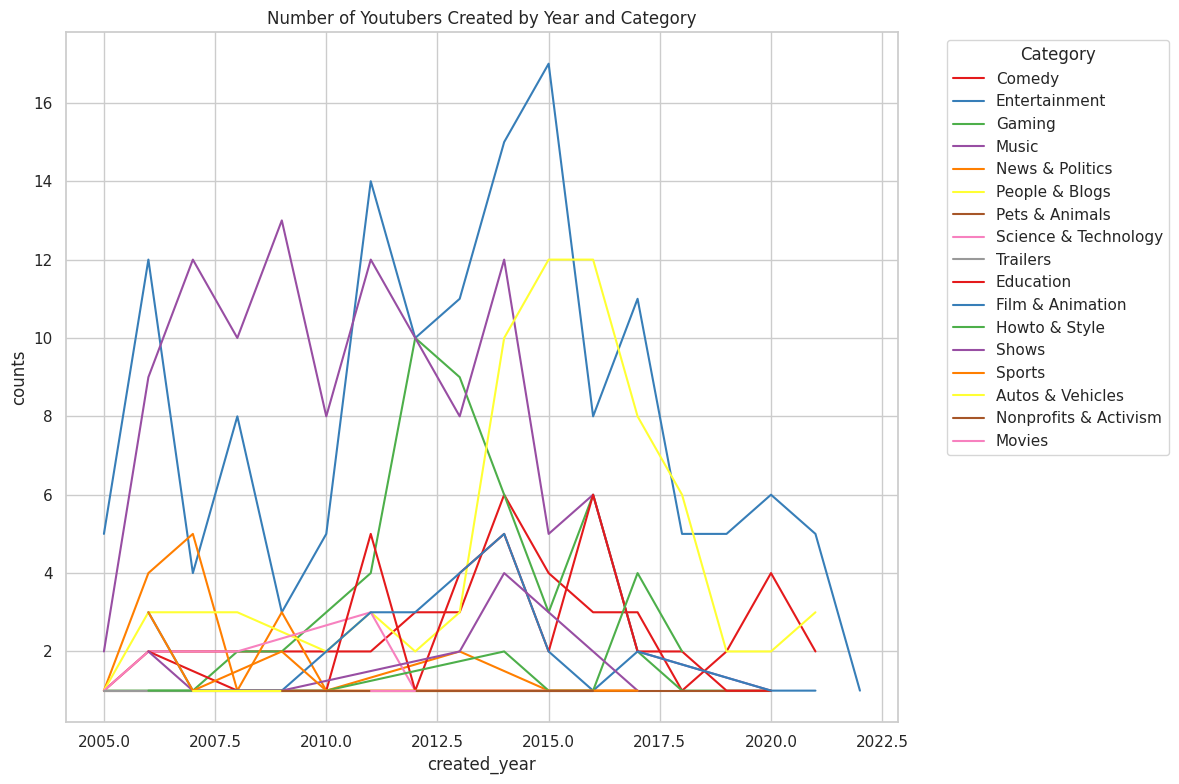

In [57]:
df['created_year'] = df['created_year'].astype(int)
created_trend = df.groupby(['created_year', 'category']).size().reset_index(name='counts')

plt.figure(figsize=(12, 8))
sns.lineplot(data=created_trend, x='created_year', y='counts', hue='category', palette='Set1')
plt.title('Number of Youtubers Created by Year and Category')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Category')

plt.tight_layout()

plt.show()



> - 2012년과 2013년 사이에 다양한 카테고리에서 유튜버 수가 급격히 증가, 이는 플랫폼의 확장과 사용자 기반의 증가 때문일 가능성.
- 2015년 이후, 모든 카테고리에서 새로운 유튜버 수가 일반적으로 감소하고 있으며, 이는 콘텐츠 포화 상태, 제작 어려움, 또는 TikTok 및 Twitch와 같은 다른 플랫폼으로의 이동 요인 가능성.
- **Entertainment**와 **Music** 카테고리 2007년부터 2015년까지 유튜버 수 꾸준히 증가 이후 감소세. 이는 두 카테고리가 한때 매우 인기 있었으나 시간이 지남에 따라 다른 콘텐츠 유형에 의해 가려졌음을 시사.
- **Gaming** 카테고리는 2010년부터 급격히 성장. 감소세가 있었지만 다른 카테고리와 비교해 여전히 강세를 유지.
- **Science & Technology**, **Autos & Vehicles**, **Nonprofits & Activism** 카테고리 상대적으로 적은 수의 유튜버와 특정 기간 동안만 활동적인 것으로 확인되어, 이러한 주제가 제한된 인기를 가지거나 특정 이벤트에 의해 영향을 받을 수 있음을 확인.

<details>
  <summary>Click for English version</summary>

> - A significant increase in YouTubers was observed between 2012 and 2013 across various categories, likely due to the platform’s expansion and rising user base.
- Since 2015, there has been a general decline in the number of new YouTubers across all categories, which may be attributed to content saturation, creation difficulties, or migration to other platforms like TikTok and Twitch.
- **Entertainment** and **Music** categories saw consistent growth in the number of YouTubers from 2007 to 2015 but have shown a decline since. This trend suggests these categories were once highly popular but have been overshadowed by other content types over time.
- The **Gaming** category experienced rapid growth from 2010, although it has seen a decline, it remains strong compared to other categories.
- Categories such as **Science & Technology**, **Autos & Vehicles**, and **Nonprofits & Activism** show a relatively small number of YouTubers and appear to be active only during specific periods, indicating these topics may have limited popularity or are influenced by specific events.



# 4. CONCLUSION

**어느 나라에 영향력이 높은 크리에이터들이 많이 분포하고 있는지?**

> 미국과 인도에 다른 국가보다 많은 구독자를 갖고 있는 유튜버가 분포하고 있으며, 대부분 구독자 수와 조회수 사이에 양의 상관관계가 있음을 알 수 있다.


**이들의 분포와 각 국가의 인구학적 특성이 관계가 있는지?**

> 분명한 인과관계가 있다고 확정할 수는 없지만, 각 국가의 인구 수와 도시 거주 인구 수가 많을 수록 영향력 있는 유튜버가 있는 것을 알 수 있다.


**가장 인기 있는 카테고리는 무엇인지?**

> Entertainment가 가장 인기있는 카테고리로 다양한 스토리를 다룰 수 있는 일반적인 주제를 선택하는 것이 유튜브 채널을 운영하기 위한 좋은 전략일 수 있다.


**지난 30일 동안 활발했던 채널과 그렇지 않은 채널 사이의 카테고리 차이점이 있는지?**

> Entertainment 채널은 최근 활동 여부와 관계없이 높은 참여도와 구독률을 유지하는 반면, Nonprofits & Activism, Autos & Vehicles, Pets & Animals과 같이 덜 인기 있는 카테고리는 전반적으로 낮은 참여도를 보인다. Music 채널은 최근 활동이 적을수록 조회수와 구독자 수가 적은 경향이 있으며, Gaming 채널은 최근 활동 여부와 관계없이 특정 팬층을 끌어들이지만 넓은 대중적 인기를 가지지는 못하는 경향이 있다. 따라서 Game 을 주제로 채널을 운영하는 전략을 세울 때는 충성도가 높은 구독자를 만족시키는 방향으로 제작이 이루어져야 하는 것을 확인할 수 있다.


**카테고리 트렌드는 유튜브 시작인 2005년 이후부터 2023년까지 어떻게 변화했는지?**

> Entertainment, Music 카테고리는 2007년부터 2015년까지 가장 인기 있는 카테고리 중 하나였으나, 그 이후로 성장세가 둔화된 것을 확인할 수 있다. 이는 해당 카테고리의 인기가 감소했다고 보기보다는 유튜브의 성장이 안정화되고 새로운 카테고리의 등장으로 인해 성장세가 둔화된 것으로 해석가능하다. 또한, 전반적으로 2015년 이후 대부분의 카테고리에서 새로운 유튜버의 활동이 감소하고 있으며, 이는 콘텐츠의 포화 상태와 TikTok과 같은 새로운 플랫폼의 경쟁 때문일 가능성이 높다고 볼 수 있다.

<details>
  <summary>Click for English version</summary>


**Which countries have the most influential YouTubers?**

> United States and India has more influential Youtubers than others. Also, those Youtube channels has positive relation between subscribers and views.


**Is there any relationship between the presence of YouTubers and a country's demographic characteristics?**


> Although a causal relationship cannot be definitively established, the visualized data indicates that countries with larger total and urban populations tend to have a higher concentration of influential YouTube channels.

**Which categories are currently the most popular?**


> Entertainment is the most popular category, followed by Music, People & Blogs, and others. This suggests that choosing a broad topic could be a good strategy for creating videos.

**What differences exist between categories of channels that have been active in the last 30 days versus those that have not?**

> Channels in popular categories like Entertainment maintain high engagement and subscription rates, regardless of recent activity, while less popular categories like Nonprofits & Activism, Autos & Vehicles, and Pets & Animals have lower overall engagement. Music channels with less recent activity tend to have fewer views and subscribers, whereas Gaming channels, even if recently active, often attract niche audiences but lack broad mainstream appeal. Therefore, when developing a strategy for a channel focused on gaming, it is important to ensure that content satisfies the needs of a loyal subscriber base.


**How have category trends evolved over time?**

> Category trends on YouTube evolved significantly over time. Entertainment and Music were among the most popular categories from 2007 to 2015, but their growth has slowed down since then. This slowdown is more likely due to the stabilization of YouTube's growth and the emergence of new categories rather than a decrease in the popularity of these categories. Overall, since 2015, there has been a general decline in new YouTuber activity across most categories, likely due to the saturation of content and competition from new platforms like TikTok.



# 5. LIMITATION

1. 2023년만을 집중적으로 분석하기보다는 여러 해의 데이터를 비교하는 것이 시간에 따른 트렌드 변화를 보다 명확하게 이해하는 데 도움이 될 수 있다.

2. TikTok과 같은 다른 플랫폼의 데이터를 포함하면 플랫폼 간의 차이점과 변화하는 트렌드에 대한 더 나은 인사이트를 찾을 수 있다.

3. 2023년의 가장 구독자 수가 많은 채널만 분석하기보다는 모든 유튜브 채널의 데이터를 분석하는 것이 채널 소유자들이 더 넓은 트렌드를 이해하는 데 도움이 될 수 있다.

<details>
  <summary>Click for English version</summary>

1. Comparing data from multiple years, rather than focusing solely on 2023, would provide a clearer understanding of trend changes over time.

2. Including data from other platforms like TikTok would offer better insights into the differences and shifting trends between platforms.

3. Analyzing data from all YouTube channels, not just the most subscribed channels in 2023, would be more beneficial for channel owners looking to understand broader trends.